# Check HD results

This notebook checks that the synthetic data generated by the HD code looks reasonable 

---

### Setup

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

### Define some functions 

Now to start, lets make a function that creates some synthetic data for a particular strain, measurement noise and noise seed AND a function that gets a likelihood value given that data 

In [38]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
import numpy as np 
from plotting import standard_plot



#Function to create synthetic data
def create_synthetic_data(h,measurement_noise,seed,num_gw_sources):

    P    = SystemParameters(h=h,σp=None,σm=measurement_noise,seed=seed,num_gw_sources=num_gw_sources)       #define the system parameters as a class
    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P)     # generate some synthetic data

    return P,PTA,data

### Create some data

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1255
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling
INFO:root:Surfacing injected omega values:
INFO:root:[1.39965176e-07 5.27737774e-07 2.41586504e-07 1.66342472e-07
 7.17203524e-07]
INFO:root:You are assigning the σp terms randomly


INFO:root:You are including the PSR terms in your synthetic data generation


Running with 5 GW sources 


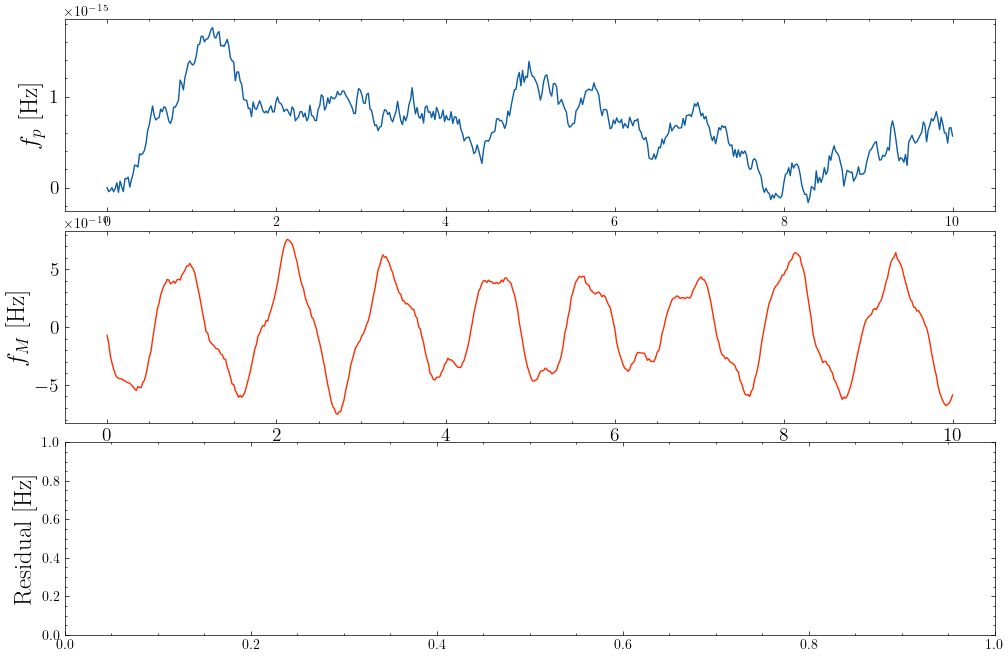

In [51]:
h = 5e-12
measurement_noise = 1e-11
seed=1255
num_gw_sources = 5
P,PTA,data = create_synthetic_data(h,measurement_noise,seed,num_gw_sources)
standard_plot(data)

# Likelihood curves 

In [57]:
import copy 
from priors import bilby_priors_dict

#Fit model to data and return likelihood
def get_likelihood(data,parameter_name,parameter_value,P,PTA,measurement_model):

    _P = copy.copy(P)
    _PTA = copy.copy(PTA)
    _P.measurement_model = measurement_model
    

    #Define the model 
    model = LinearModel(_P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,_PTA)

    #Get the\\


    init_parameters_optimal, priors_optimal = bilby_priors_dict(_PTA,_P,set_parameters_as_known=True)
    params = priors_optimal.sample(1)
    params[parameter_name] = np.array([parameter_value])

    
    model_likelihood = KF.likelihood(params)


    return model_likelihood

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1255
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling
INFO:root:Surfacing injected omega values:
INFO:root:[1.39965176e-07 5.27737774e-07 2.41586504e-07 1.66342472e-07
 7.17203524e-07 7.75500599e-07 6.24169397e-07 3.59130807e-07
 7.80931730e-07 1.41134371e-07 2.71318982e-07 3.79911264e-07
 8.70955194e-07 9.21824730e-07 5.35447546e-07 6.24825881e-07
 8.63479982e-07 2.58940045e-07 3.97066730e-07 3.87096561e-07]
INFO:root:You are assigning the σp terms randomly


Running with 20 GW sources 


INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Pulsar terms measurement functio 
INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters
INFO:root:You are using the Pulsar terms measurement functio 
INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters
INFO:root:You are using the Pulsar terms measurement functio 
INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters
INFO:root:You are using the Pulsar terms measurement functio 
INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters
INFO:root:You are using the Puls

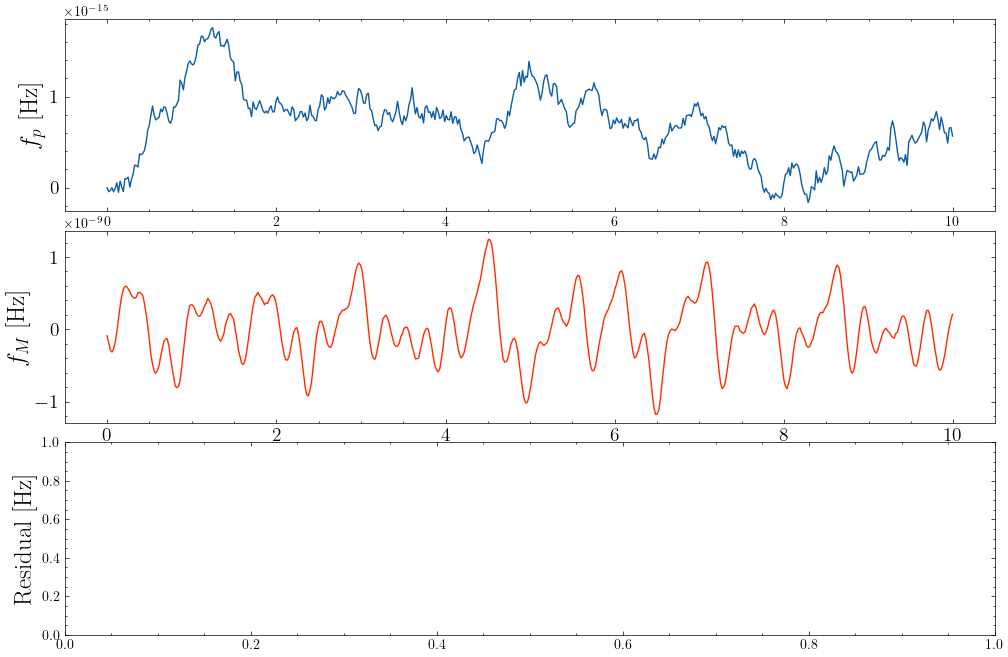

In [71]:

#Setup the system
h = 5e-12
measurement_noise = 1e-11
seed=1255
num_gw_sources = 20
measurement_model = 'pulsar'
P,PTA,data = create_synthetic_data(h,measurement_noise,seed,num_gw_sources)
standard_plot(data)
parameter_name = "omega_gw_0"

parameter_value = P.Ω[0]*1.01



N = 10
likelihoods = np.zeros(N)
parameter_values = np.linspace(0.9*P.Ω[0],1.1*P.Ω[0],N)

for i in range(N):
    likelihoods[i] = get_likelihood(data,parameter_name,parameter_values[i],P,PTA,measurement_model)

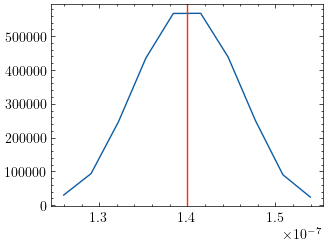

In [70]:
import matplotlib.pyplot as plt 
plt.plot(parameter_values,likelihoods)
plt.axvline(P.Ω[0],c='C3')

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1255
INFO:root:Multiple GW sources requested. Overwriting default GW parameters and randomly sampling
INFO:root:Surfacing injected omega values:
INFO:root:[1.39965176e-07 5.27737774e-07 2.41586504e-07 1.66342472e-07
 7.17203524e-07 7.75500599e-07 6.24169397e-07 3.59130807e-07
 7.80931730e-07 1.41134371e-07 2.71318982e-07 3.79911264e-07
 8.70955194e-07 9.21824730e-07 5.35447546e-07 6.24825881e-07
 8.63479982e-07 2.58940045e-07 3.97066730e-07 3.87096561e-07]
INFO:root:You are assigning the σp terms randomly


Running with 20 GW sources 


INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Pulsar terms measurement functio 
INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters
INFO:root:You are using the Pulsar terms measurement functio 
INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters
INFO:root:You are using the Pulsar terms measurement functio 
INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters
INFO:root:You are using the Pulsar terms measurement functio 
INFO:root:Setting the bilby priors dict
INFO:root:Setting fully informative priors on GW parameters
INFO:root:Setting fully informative priors on PSR parameters
INFO:root:You are using the Puls

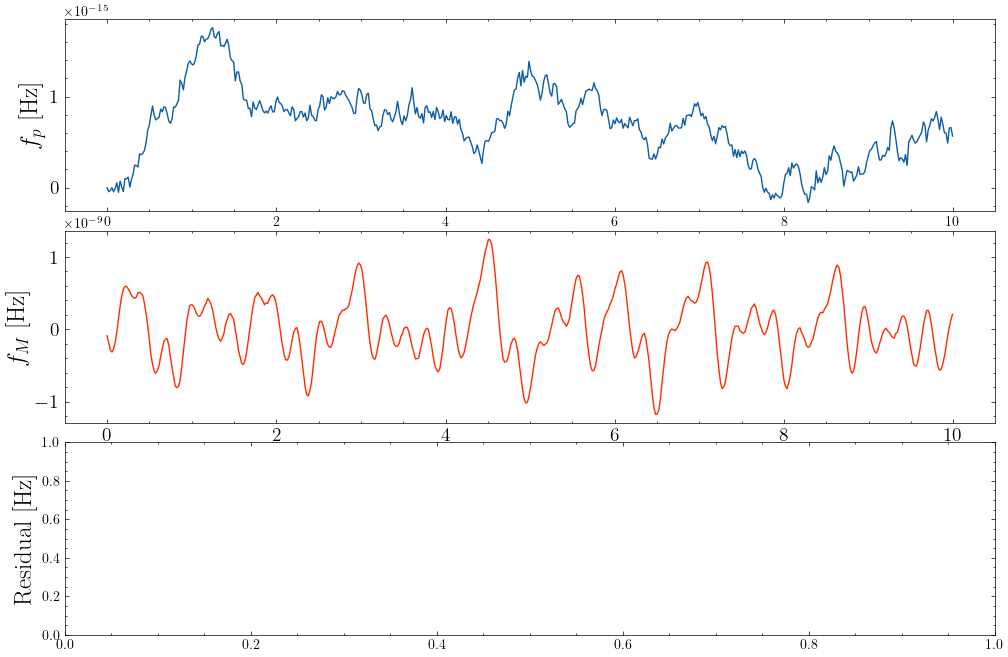

In [74]:

#Setup the system
h = 5e-12
measurement_noise = 1e-11
seed=1255
num_gw_sources = 20
measurement_model = 'pulsar'
P,PTA,data = create_synthetic_data(h,measurement_noise,seed,num_gw_sources)
standard_plot(data)
parameter_name = "delta_gw_0"


N = 10
likelihoods = np.zeros(N)
parameter_values = np.linspace(0.9*P.δ[0],1.1*P.δ[0],N)

for i in range(N):
    likelihoods[i] = get_likelihood(data,parameter_name,parameter_values[i],P,PTA,measurement_model)



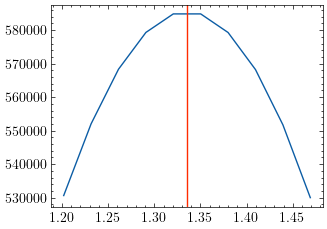

In [75]:
import matplotlib.pyplot as plt 
plt.plot(parameter_values,likelihoods)
plt.axvline(P.δ[0],c='C3')

### Now lets do the same again, but iterate over all parameters:

In [38]:
#Set the measurement model again
measurement_model = 'pulsar' #Set the measurement model 


parameter_names = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
N = int(1e3)
parameter_ranges = [np.logspace(-9,-5,N),
                    np.linspace(-1.0,1.0,N),
                    np.linspace(2.0,3.0,N),
                    np.linspace(0.5,1.5,N),
                    np.linspace(0.5,1.5,N),
                    np.linspace(0.5,1.5,N),
                    np.logspace(-13,-11,N)
]



likelihood_data_dictionary={}


for j,parameter_name in enumerate(parameter_names):
    parameter_range = parameter_ranges[j]
    likelihood_data_array = np.zeros(len(parameter_range))     
      

    for i,p in enumerate(parameter_range):
        p = parameter_range[i]
        likelihood_data_array[i] = get_likelihood(data,parameter_name,p,P,PTA,measurement_model)

    likelihood_data_dictionary[parameter_name] = likelihood_data_array

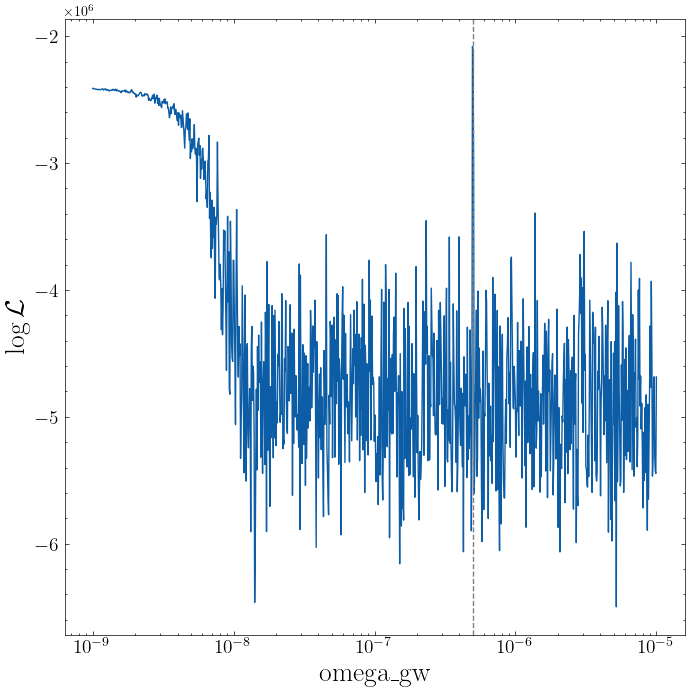

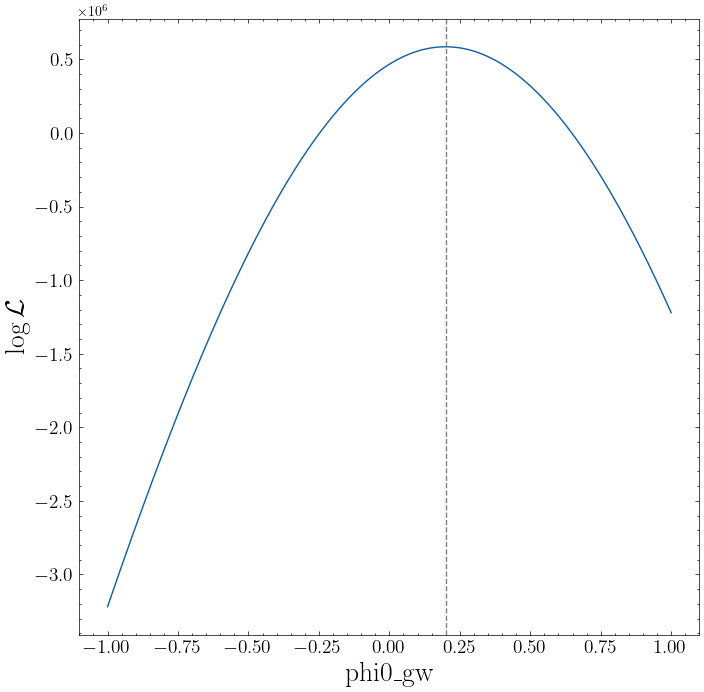

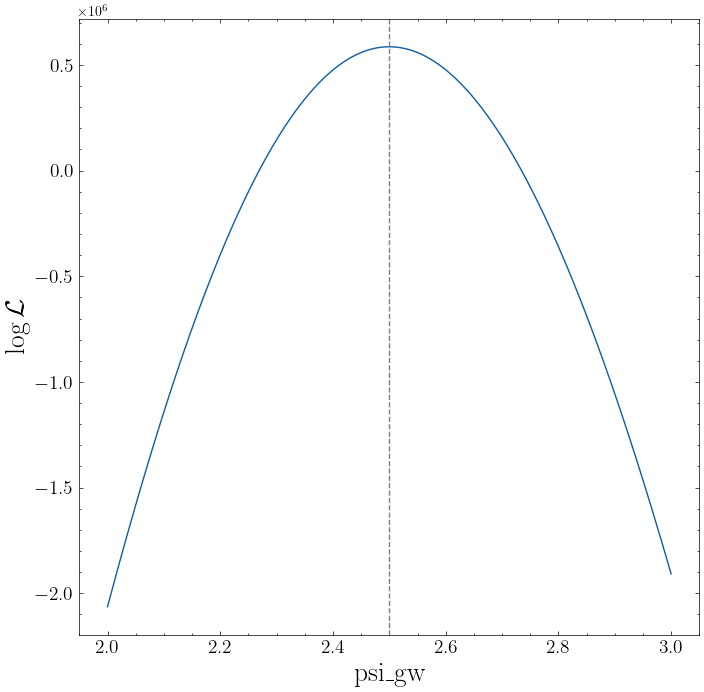

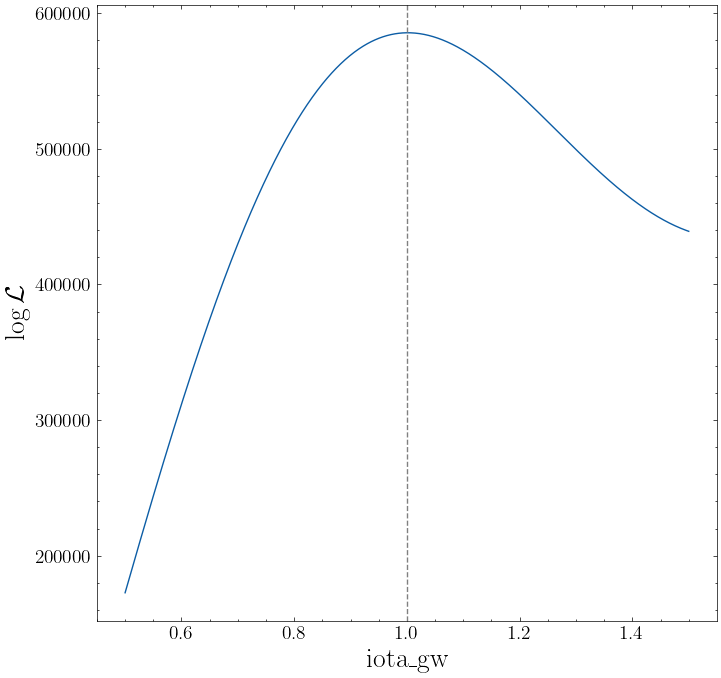

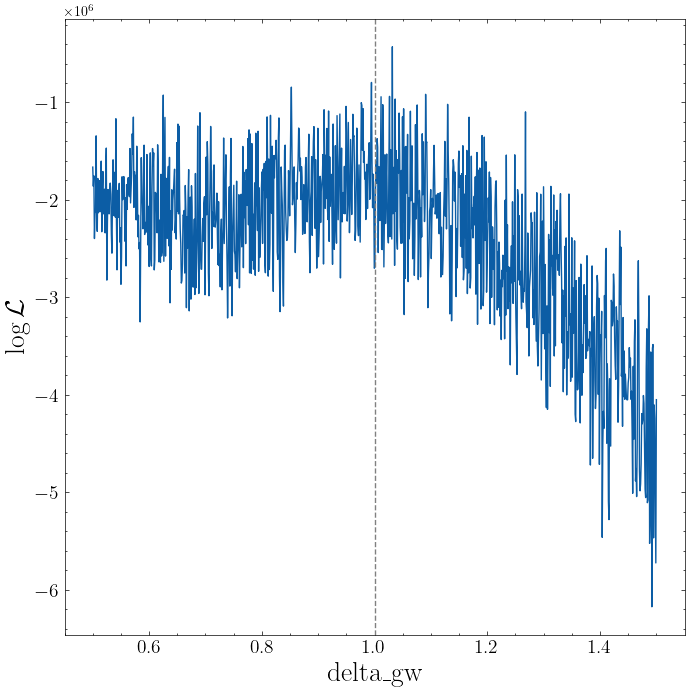

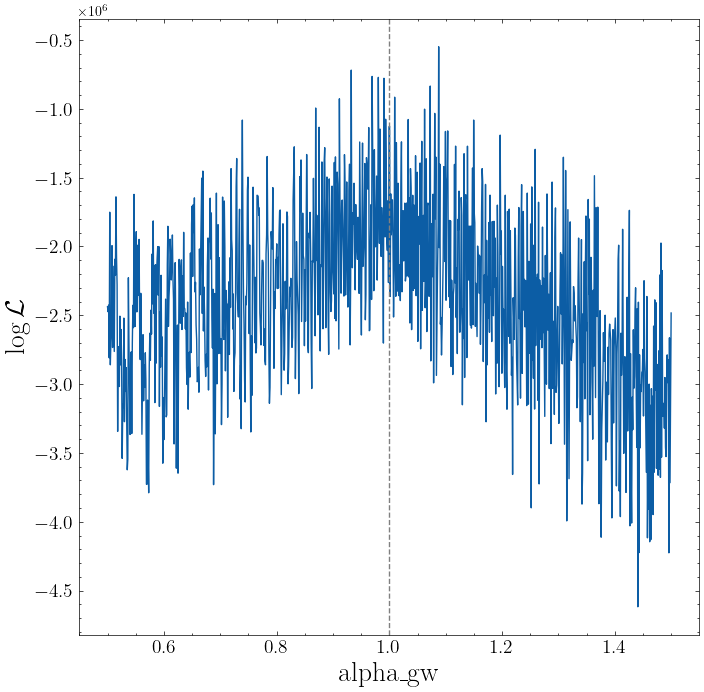

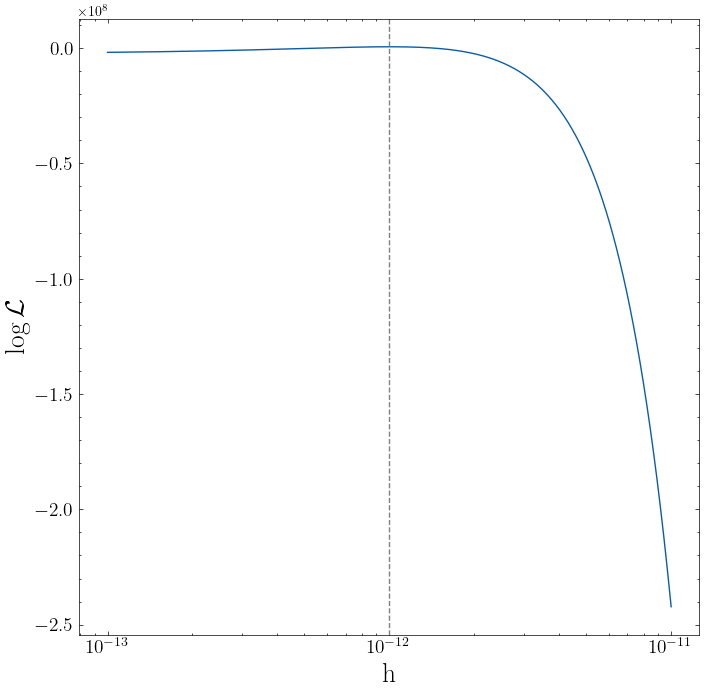

In [39]:
#And plot it all
log_axes = ["omega_gw","h"]
injection_values = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
for j,parameter_name in enumerate(parameter_names):
    if parameter_name in log_axes:
        log_x_axes=True
    else:
        log_x_axes=False
    plot_likelihood(parameter_ranges[j],likelihood_data_dictionary[parameter_name],parameter_name,log_x_axes=log_x_axes,injection=injection_values[j])


Most of the curves reamain smooth, but $\Omega$, $\delta$ and and $\alpha$ are super noisy


### What about with just the Earth terms?


Lets do the same again, but drop the pulsar terms

In [40]:
#Set the measurement model again
measurement_model = 'earth' #Set the measurement model 

parameter_names = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
N = int(1e3)
parameter_ranges = [np.logspace(-9,-5,N),
                    np.linspace(-1.0,1.0,N),
                    np.linspace(2.0,3.0,N),
                    np.linspace(0.5,1.5,N),
                    np.linspace(0.5,1.5,N),
                    np.linspace(0.5,1.5,N),
                    np.logspace(-13,-11,N)
]



likelihood_data_dictionary_earth={}


for j,parameter_name in enumerate(parameter_names):
    parameter_range = parameter_ranges[j]
    likelihood_data_array = np.zeros(len(parameter_range))     
      

    for i,p in enumerate(parameter_range):
        p = parameter_range[i]
        likelihood_data_array[i] = get_likelihood(data,parameter_name,p,P,PTA,measurement_model)

    likelihood_data_dictionary_earth[parameter_name] = likelihood_data_array

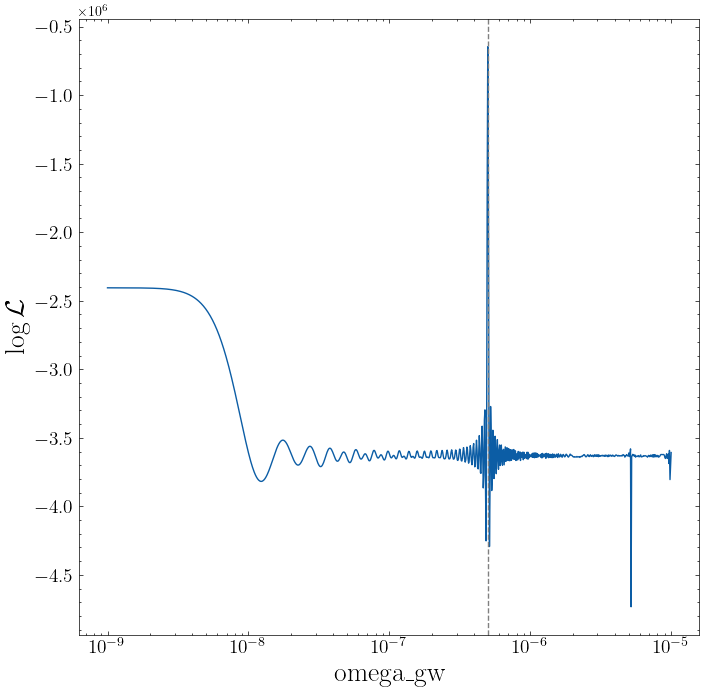

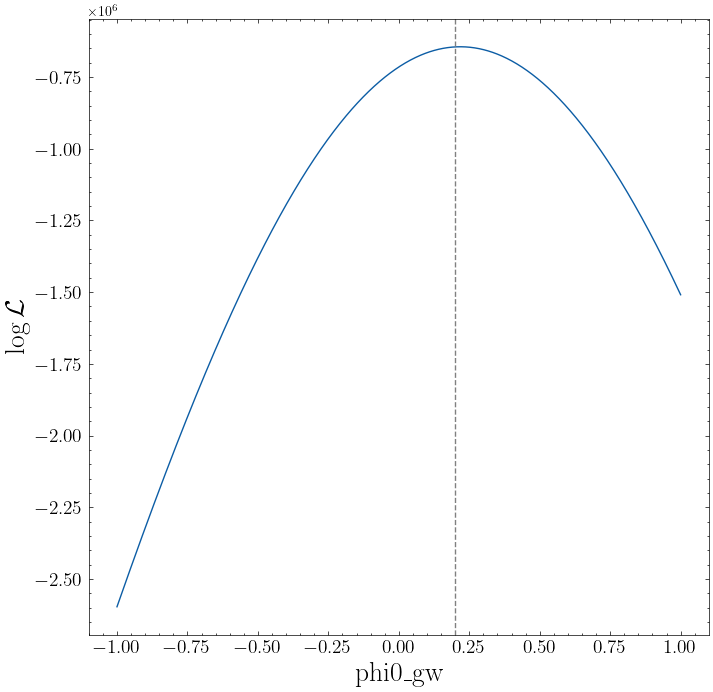

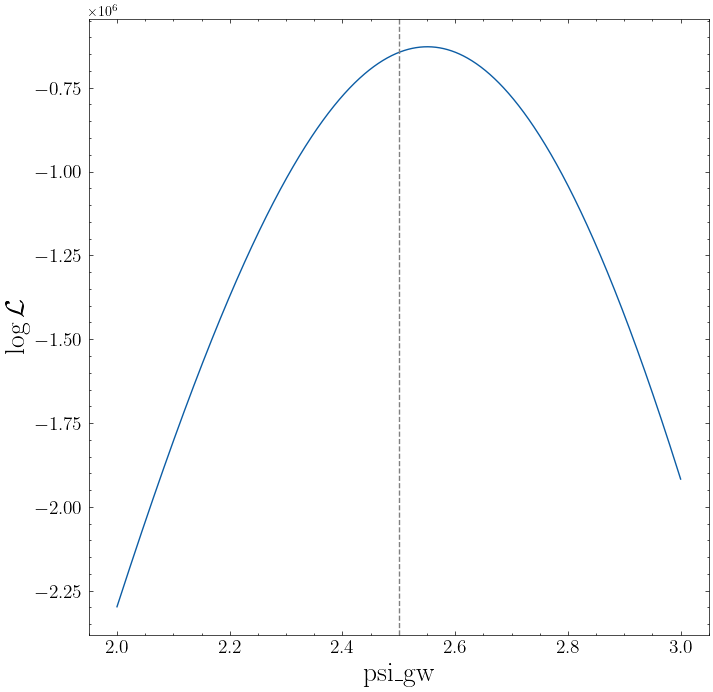

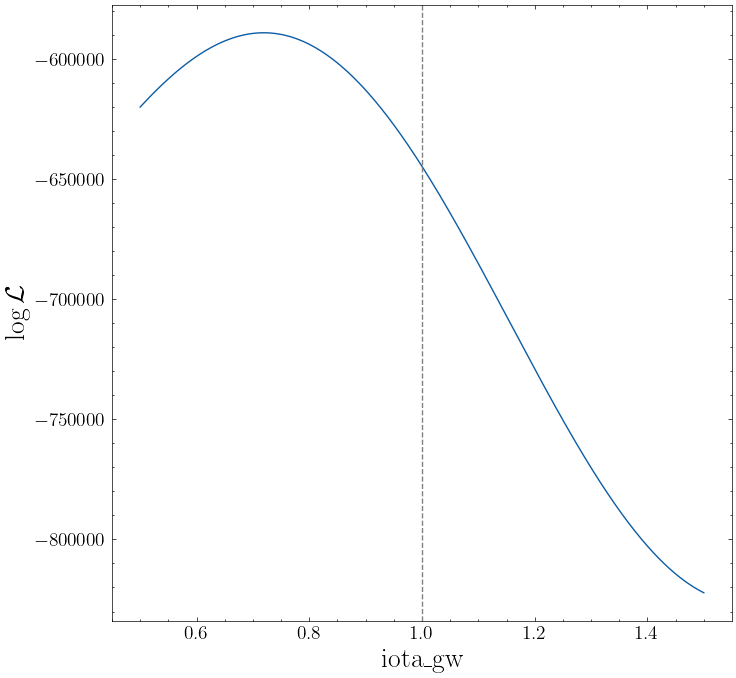

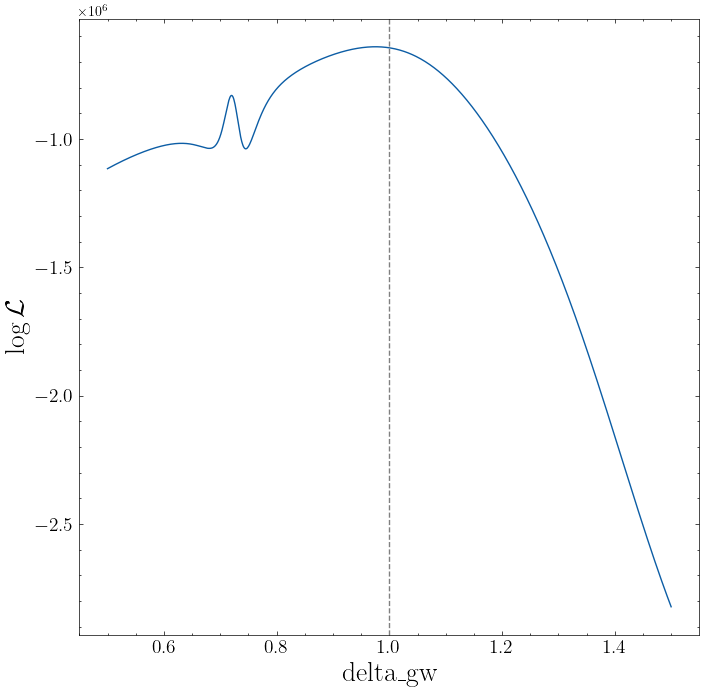

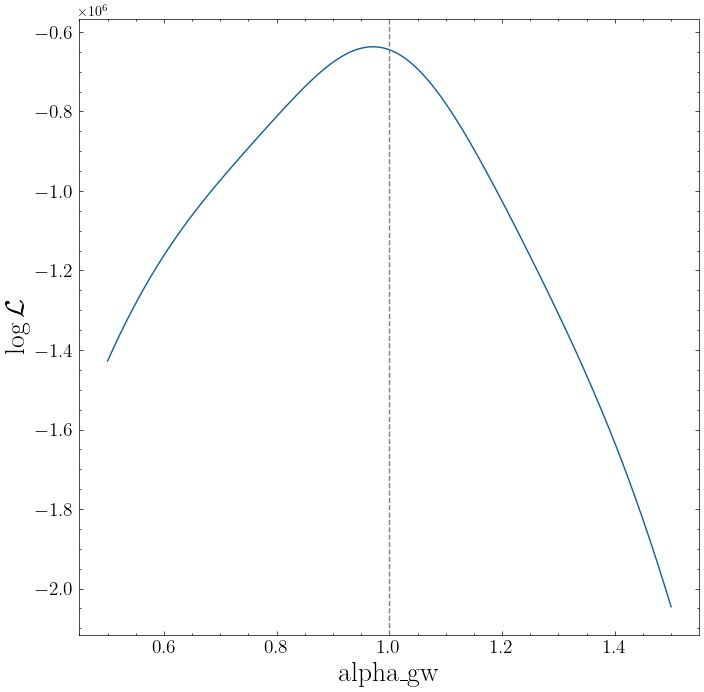

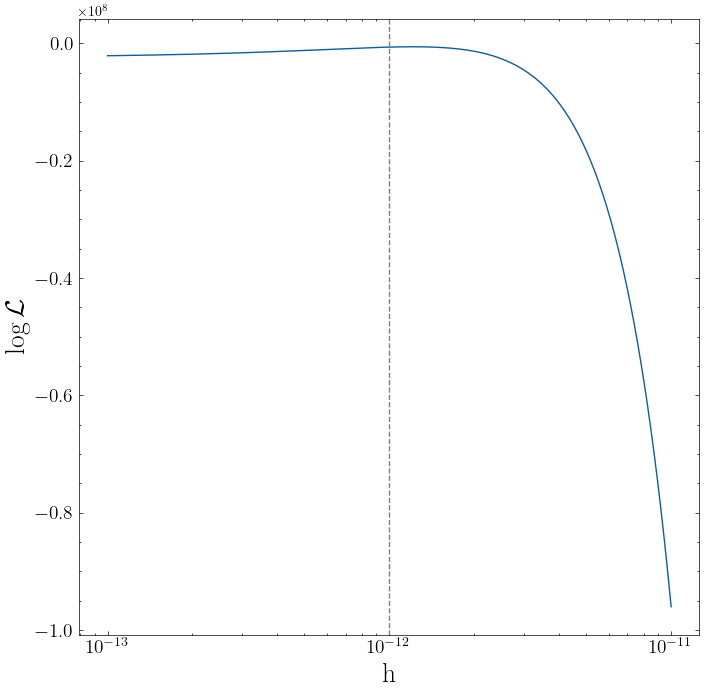

In [41]:
#And plot it all
log_axes = ["omega_gw","h"]
injection_values = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
for j,parameter_name in enumerate(parameter_names):
    if parameter_name in log_axes:
        log_x_axes=True
    else:
        log_x_axes=False
    plot_likelihood(parameter_ranges[j],likelihood_data_dictionary_earth[parameter_name],parameter_name,log_x_axes=log_x_axes,injection=injection_values[j])


# Appendix: Analytical form

In [42]:

def simple_model(omega,phi0,b,t): #b = (1+n \cdot q) d
    return np.cos(-omega*t + phi0) -  np.cos(-omega*t + phi0 + omega*b)


def log_likelihood(y,yc):
    return np.sum((yc - y)**2)

In [50]:
cadence = 7
TT = 10
dt = cadence * 24*3600 #from days to step_seconds
end_seconds= TT* 365*24*3600 #from years to second
t       = np.arange(0,end_seconds,dt)


omega = 5e-7
b = #(1+n \cdot q) d
yc = simple_model(omega,0.2,0.3,t)
y = simple_model(omega * 1.5,0.2,0.3,t)

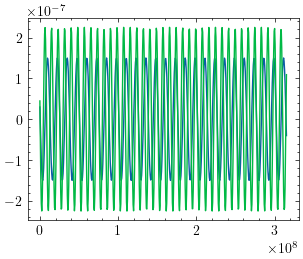

In [51]:
import matplotlib.pyplot as plt 

plt.plot(t,yc)
plt.plot(t,y)

In [45]:
omega_vals = np.arange(0.5,1.5,0.1)
likelihoods= np.zeros_like(omega_vals)
for i,omega in enumerate(omega_vals):
    y = simple_model(omega,0.2,0.3,t)
    likelihoods[i] = log_likelihood(y,yc)



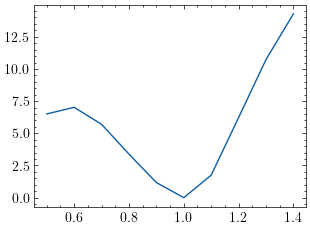

In [46]:
plt.plot(omega_vals,likelihoods)